In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import time
import random

random_seed = 600
np.random.seed(random_seed)
random.seed(random_seed)

import sys
import os
os.environ['PYTHONHASHSEED'] = '0'

import tensorflow as tf
tf.compat.v1.random.set_random_seed(random_seed)

In [3]:
def plot_tsne(x, colors, plot_name, model_name, method_name):
    import seaborn as sns
    import matplotlib.patheffects
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    
    alpha=0.6
    
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[colors==1, 0], x[colors==1,1], lw=0, s=40, c='indigo', label = 'ACP', alpha = alpha)
    sc = ax.scatter(x[colors==0, 0], x[colors==0,1], lw=0, s=40, c='orangered', label = 'noACP', alpha = alpha)
    #ax.legend(['0','1'])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    plt.title(method_name+' '+plot_name+' - Database '+model_name)
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.legend()
    ax.axis('on')
    ax.axis('tight')
    plt.savefig('C:/Users/drn_x/Desktop/'+method_name+'_Figures/'+method_name+'_'+plot_name+'_'+model_name+'.svg', format='svg', dpi=1200)

    # add the labels for each digit corresponding to the label
    txts = []

    #for i in range(num_classes):

        # Position of each label at median of data points.

        #xtext, ytext = np.median(x[colors == i, :], axis=0)
        #txt = ax.text(xtext, ytext, str(i), fontsize=24)
        #txt.set_path_effects([
            #matplotlib.patheffects.Stroke(linewidth=5, foreground="w"),
            #matplotlib.patheffects.Normal()])
        #txts.append(txt)

    #return f, ax, sc, txts

In [4]:
def build_datasets(df_model):
    X = df_model.iloc[:, :-1]

    y = df_model.iloc[:,-1]

    #scaler = StandardScaler()
    #scaler.fit(X)
    #X = scaler.transform(X)

    return X, y

In [5]:
def change_index(df):
    #Cambiar indices de filas y columnas por valores numéricos
    total_rows_df = df.shape[0]
    df.index = np.arange(0, total_rows_df)

    total_columns_df = df.shape[1]
    df.columns = np.arange(0, total_columns_df)

    return df

In [8]:
def dipolemoment():

    path_full = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/Full/full_DipoleMoment.txt'
    path_full_ind = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/Full/ind_full_dipolemoment.txt'

    path_nf = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/NoFeature/nf_DipoleMoment.txt'
    path_nf_ind = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/NoFeature/ind_nf_dipoleMoment.txt'
    
    # Database Full ---------------------------------------------------------------------------

    df_full = pd.read_csv(path_full, sep=" ", header=None)
    ind_full = pd.read_csv(path_full_ind, sep=" ", header=None)
    
    df_model_temp = df_full
    df_test = ind_full

    frames = [df_model_temp, df_test]
    df_model = pd.concat(frames)

    df_model_full = change_index(df_model)

    X_full, y_full = build_datasets(df_model_full)
    
    # Database No feature ----------------------------------------------------------------------

    df_nf= pd.read_csv(path_nf, sep=" ", header=None)
    ind_nf = pd.read_csv(path_nf_ind, sep=" ", header=None)
    
    df_model_temp = df_nf
    df_test = ind_nf
    frames = [df_model_temp, df_test]
    df_model = pd.concat(frames)

    df_model_nf = change_index(df_model)

    X_nf, y_nf = build_datasets(df_model_nf)
    
    from sklearn.manifold import TSNE
    
    # Database Full ---------------------------------------------------------------------------
    
    plot_name = 'Dipole Moment'
    
    model_tsne = TSNE(random_state=42).fit_transform(X_full)
    
    plot_tsne(model_tsne, y_full, plot_name, model_name = "Full", method_name = 'TSNe')
    
    # Database No feature ----------------------------------------------------------------------
    
    model_tsne = TSNE(random_state=42).fit_transform(X_nf)
    
    plot_tsne(model_tsne, y_nf, plot_name, model_name = "No Feature", method_name = 'TSNe')
    
    #PCA ------------------------------------
    
    from sklearn.decomposition import PCA
    
    # Database Full ---------------------------------------------------------------------------
    
    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(X_full)
    
    pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

    pca_df['pca1'] = pca_result[:,0]
    pca_df['pca2'] = pca_result[:,1]
    pca_df['pca3'] = pca_result[:,2]
    pca_df['pca4'] = pca_result[:,3]
    
    print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
    
    top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

    plot_tsne(top_two_comp.values, y_full, plot_name, model_name = "Full", method_name = 'PCA') # Visualizing the PCA output
    
    # Database No feature ----------------------------------------------------------------------
    
    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(X_nf)
    
    pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

    pca_df['pca1'] = pca_result[:,0]
    pca_df['pca2'] = pca_result[:,1]
    pca_df['pca3'] = pca_result[:,2]
    pca_df['pca4'] = pca_result[:,3]
    
    print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
    
    top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

    plot_tsne(top_two_comp.values, y_nf, plot_name, model_name = "No Feature", method_name = 'PCA') # Visualizing the PCA output

In [16]:
def hydro():

    path_full = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/Full/full_hydro.txt'
    path_full_ind = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/Full/ind_full_hydrophobicity.txt'

    path_nf = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/NoFeature/nf_hydro.txt'
    path_nf_ind = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/NoFeature/ind_nf_hydrophobicity.txt'
    
    # Database Full ---------------------------------------------------------------------------

    df_full = pd.read_csv(path_full, sep=" ", header=None)
    ind_full = pd.read_csv(path_full_ind, sep=" ", header=None)
    
    df_model_temp = df_full
    df_test = ind_full

    frames = [df_model_temp, df_test]
    df_model = pd.concat(frames)

    df_model_full = change_index(df_model)

    X_full, y_full = build_datasets(df_model_full)
    
    # Database No feature ----------------------------------------------------------------------

    df_nf= pd.read_csv(path_nf, sep=" ", header=None)
    ind_nf = pd.read_csv(path_nf_ind, sep=" ", header=None)
    
    df_model_temp = df_nf
    df_test = ind_nf
    frames = [df_model_temp, df_test]
    df_model = pd.concat(frames)

    df_model_nf = change_index(df_model)

    X_nf, y_nf = build_datasets(df_model_nf)
    
    from sklearn.manifold import TSNE
    
    # Database Full ---------------------------------------------------------------------------
    
    plot_name = 'Hydrophobicity'
    
    model_tsne = TSNE(random_state=42).fit_transform(X_full)
    
    plot_tsne(model_tsne, y_full, plot_name, model_name = "Full", method_name = 'TSNe')
    
    # Database No feature ----------------------------------------------------------------------
    
    model_tsne = TSNE(random_state=42).fit_transform(X_nf)
    
    plot_tsne(model_tsne, y_nf, plot_name, model_name = "No Feature", method_name = 'TSNe')
    
    #PCA ------------------------------------
    
    from sklearn.decomposition import PCA
    
    # Database Full ---------------------------------------------------------------------------
    
    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(X_full)
    
    pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

    pca_df['pca1'] = pca_result[:,0]
    pca_df['pca2'] = pca_result[:,1]
    pca_df['pca3'] = pca_result[:,2]
    pca_df['pca4'] = pca_result[:,3]
    
    print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
    
    top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

    plot_tsne(top_two_comp.values, y_full, plot_name, model_name = "Full", method_name = 'PCA') # Visualizing the PCA output
    
    # Database No feature ----------------------------------------------------------------------
    
    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(X_nf)
    
    pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

    pca_df['pca1'] = pca_result[:,0]
    pca_df['pca2'] = pca_result[:,1]
    pca_df['pca3'] = pca_result[:,2]
    pca_df['pca4'] = pca_result[:,3]
    
    print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
    
    top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

    plot_tsne(top_two_comp.values, y_nf, plot_name, model_name = "No Feature", method_name = 'PCA') # Visualizing the PCA output

In [17]:
def polarity():

    path_full = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/Full/full_Polarity.txt'
    path_full_ind = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/Full/ind_full_polarity.txt'

    path_nf = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/NoFeature/nf_Polarity.txt'
    path_nf_ind = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/NoFeature/ind_nf_polarity.txt'
    
    # Database Full ---------------------------------------------------------------------------

    df_full = pd.read_csv(path_full, sep=" ", header=None)
    ind_full = pd.read_csv(path_full_ind, sep=" ", header=None)
    
    df_model_temp = df_full
    df_test = ind_full

    frames = [df_model_temp, df_test]
    df_model = pd.concat(frames)

    df_model_full = change_index(df_model)

    X_full, y_full = build_datasets(df_model_full)
    
    # Database No feature ----------------------------------------------------------------------

    df_nf= pd.read_csv(path_nf, sep=" ", header=None)
    ind_nf = pd.read_csv(path_nf_ind, sep=" ", header=None)
    
    df_model_temp = df_nf
    df_test = ind_nf
    frames = [df_model_temp, df_test]
    df_model = pd.concat(frames)

    df_model_nf = change_index(df_model)

    X_nf, y_nf = build_datasets(df_model_nf)
    
    from sklearn.manifold import TSNE
    
    # Database Full ---------------------------------------------------------------------------
    
    plot_name = 'Polarity'
    
    model_tsne = TSNE(random_state=42).fit_transform(X_full)
    
    plot_tsne(model_tsne, y_full, plot_name, model_name = "Full", method_name = 'TSNe')
    
    # Database No feature ----------------------------------------------------------------------
    
    model_tsne = TSNE(random_state=42).fit_transform(X_nf)
    
    plot_tsne(model_tsne, y_nf, plot_name, model_name = "No Feature", method_name = 'TSNe')
    
    #PCA ------------------------------------
    
    from sklearn.decomposition import PCA
    
    # Database Full ---------------------------------------------------------------------------
    
    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(X_full)
    
    pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

    pca_df['pca1'] = pca_result[:,0]
    pca_df['pca2'] = pca_result[:,1]
    pca_df['pca3'] = pca_result[:,2]
    pca_df['pca4'] = pca_result[:,3]
    
    print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
    
    top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

    plot_tsne(top_two_comp.values, y_full, plot_name, model_name = "Full", method_name = 'PCA') # Visualizing the PCA output
    
    # Database No feature ----------------------------------------------------------------------
    
    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(X_nf)
    
    pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

    pca_df['pca1'] = pca_result[:,0]
    pca_df['pca2'] = pca_result[:,1]
    pca_df['pca3'] = pca_result[:,2]
    pca_df['pca4'] = pca_result[:,3]
    
    print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
    
    top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

    plot_tsne(top_two_comp.values, y_nf, plot_name, model_name = "No Feature", method_name = 'PCA') # Visualizing the PCA output

In [18]:
def polarizability():

    path_full = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/Full/full_polarizability.txt'
    path_full_ind = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/Full/ind_full_polarizability.txt'

    path_nf = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/NoFeature/nf_polarizability.txt'
    path_nf_ind = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/NoFeature/ind_nf_polarizability.txt'
    
    # Database Full ---------------------------------------------------------------------------

    df_full = pd.read_csv(path_full, sep=" ", header=None)
    ind_full = pd.read_csv(path_full_ind, sep=" ", header=None)
    
    df_model_temp = df_full
    df_test = ind_full

    frames = [df_model_temp, df_test]
    df_model = pd.concat(frames)

    df_model_full = change_index(df_model)

    X_full, y_full = build_datasets(df_model_full)
    
    # Database No feature ----------------------------------------------------------------------

    df_nf= pd.read_csv(path_nf, sep=" ", header=None)
    ind_nf = pd.read_csv(path_nf_ind, sep=" ", header=None)
    
    df_model_temp = df_nf
    df_test = ind_nf
    frames = [df_model_temp, df_test]
    df_model = pd.concat(frames)

    df_model_nf = change_index(df_model)

    X_nf, y_nf = build_datasets(df_model_nf)
    
    from sklearn.manifold import TSNE
    
    # Database Full ---------------------------------------------------------------------------
    
    plot_name = 'Polarizability'
    
    model_tsne = TSNE(random_state=42).fit_transform(X_full)
    
    plot_tsne(model_tsne, y_full, plot_name, model_name = "Full", method_name = 'TSNe')
    
    # Database No feature ----------------------------------------------------------------------
    
    model_tsne = TSNE(random_state=42).fit_transform(X_nf)
    
    plot_tsne(model_tsne, y_nf, plot_name, model_name = "No Feature", method_name = 'TSNe')
    
    #PCA ------------------------------------
    
    from sklearn.decomposition import PCA
    
    # Database Full ---------------------------------------------------------------------------
    
    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(X_full)
    
    pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

    pca_df['pca1'] = pca_result[:,0]
    pca_df['pca2'] = pca_result[:,1]
    pca_df['pca3'] = pca_result[:,2]
    pca_df['pca4'] = pca_result[:,3]
    
    print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
    
    top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

    plot_tsne(top_two_comp.values, y_full, plot_name, model_name = "Full", method_name = 'PCA') # Visualizing the PCA output
    
    # Database No feature ----------------------------------------------------------------------
    
    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(X_nf)
    
    pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

    pca_df['pca1'] = pca_result[:,0]
    pca_df['pca2'] = pca_result[:,1]
    pca_df['pca3'] = pca_result[:,2]
    pca_df['pca4'] = pca_result[:,3]
    
    print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
    
    top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

    plot_tsne(top_two_comp.values, y_nf, plot_name, model_name = "No Feature", method_name = 'PCA') # Visualizing the PCA output

In [19]:
def vanWaals():

    path_full = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/Full/full_VanWaals.txt'
    path_full_ind = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/Full/ind_full_vanWaals.txt'

    path_nf = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/NoFeature/nf_VanWaals.txt'
    path_nf_ind = 'C:/Users/drn_x/Desktop/FinalModel_October/Databases/NoFeature/ind_nf_vanWaals.txt'
    
    # Database Full ---------------------------------------------------------------------------

    df_full = pd.read_csv(path_full, sep=" ", header=None)
    ind_full = pd.read_csv(path_full_ind, sep=" ", header=None)
    
    df_model_temp = df_full
    df_test = ind_full

    frames = [df_model_temp, df_test]
    df_model = pd.concat(frames)

    df_model_full = change_index(df_model)

    X_full, y_full = build_datasets(df_model_full)
    
    # Database No feature ----------------------------------------------------------------------

    df_nf= pd.read_csv(path_nf, sep=" ", header=None)
    ind_nf = pd.read_csv(path_nf_ind, sep=" ", header=None)
    
    df_model_temp = df_nf
    df_test = ind_nf
    frames = [df_model_temp, df_test]
    df_model = pd.concat(frames)

    df_model_nf = change_index(df_model)

    X_nf, y_nf = build_datasets(df_model_nf)
    
    from sklearn.manifold import TSNE
    
    # Database Full ---------------------------------------------------------------------------
    
    plot_name = 'Van Waals Volume'
    
    model_tsne = TSNE(random_state=42).fit_transform(X_full)
    
    plot_tsne(model_tsne, y_full, plot_name, model_name = "Full", method_name = 'TSNe')
    
    # Database No feature ----------------------------------------------------------------------
    
    model_tsne = TSNE(random_state=42).fit_transform(X_nf)
    
    plot_tsne(model_tsne, y_nf, plot_name, model_name = "No Feature", method_name = 'TSNe')
    
    #PCA ------------------------------------
    
    from sklearn.decomposition import PCA
    
    # Database Full ---------------------------------------------------------------------------
    
    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(X_full)
    
    pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

    pca_df['pca1'] = pca_result[:,0]
    pca_df['pca2'] = pca_result[:,1]
    pca_df['pca3'] = pca_result[:,2]
    pca_df['pca4'] = pca_result[:,3]
    
    print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
    
    top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

    plot_tsne(top_two_comp.values, y_full, plot_name, model_name = "Full", method_name = 'PCA') # Visualizing the PCA output
    
    # Database No feature ----------------------------------------------------------------------
    
    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(X_nf)
    
    pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

    pca_df['pca1'] = pca_result[:,0]
    pca_df['pca2'] = pca_result[:,1]
    pca_df['pca3'] = pca_result[:,2]
    pca_df['pca4'] = pca_result[:,3]
    
    print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
    
    top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

    plot_tsne(top_two_comp.values, y_nf, plot_name, model_name = "No Feature", method_name = 'PCA') # Visualizing the PCA output

Variance explained per principal component: [0.23232652 0.06723327 0.05774853 0.054058  ]
Variance explained per principal component: [0.29131072 0.11949187 0.08730017 0.0630128 ]


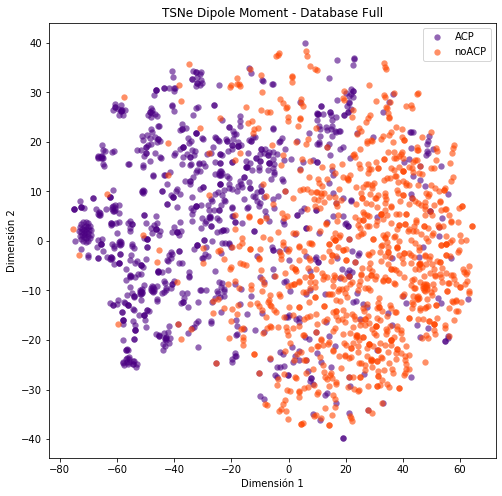

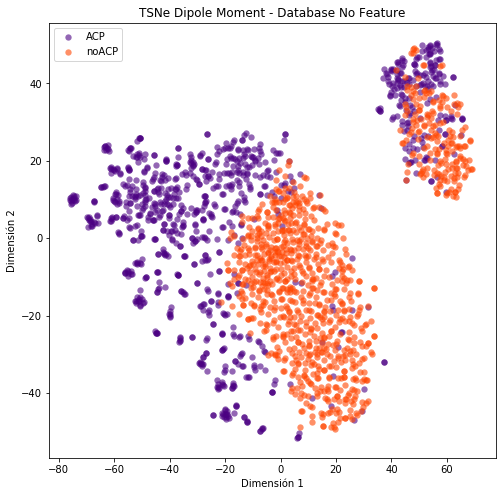

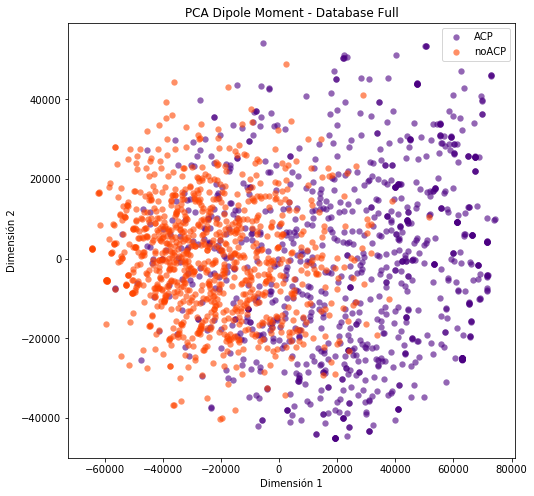

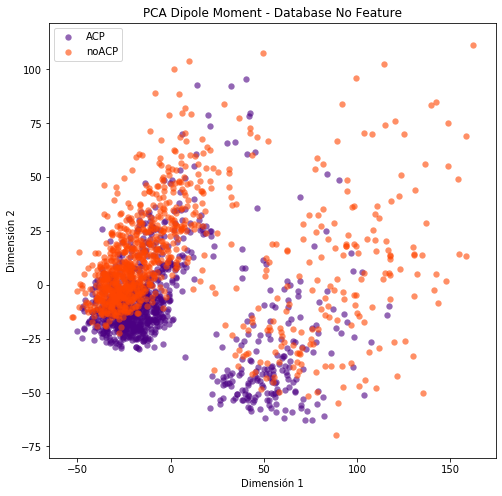

In [20]:
dipolemoment()

Variance explained per principal component: [0.23232637 0.06723424 0.05775262 0.05406445]
Variance explained per principal component: [0.37146565 0.09224728 0.07814191 0.05635067]


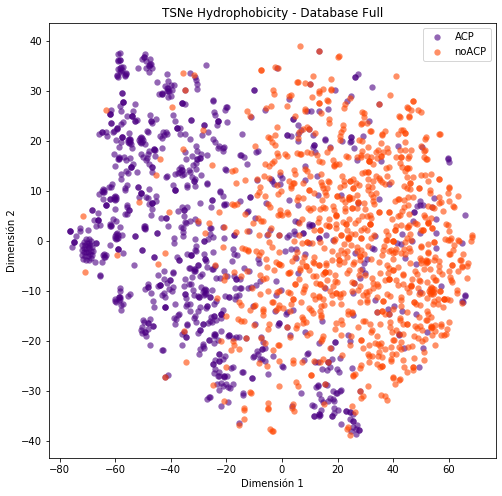

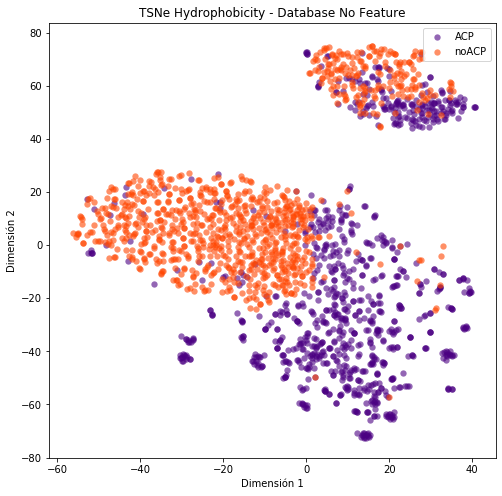

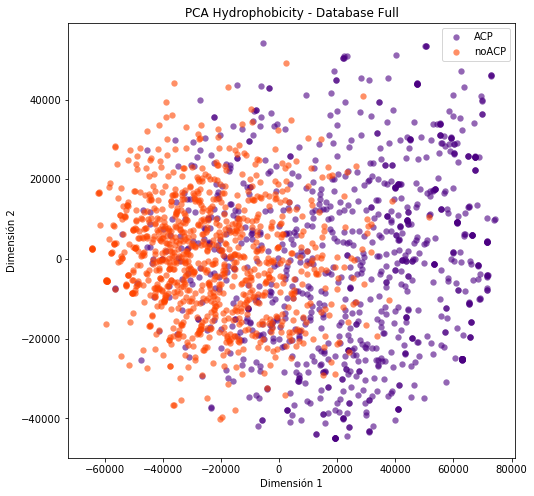

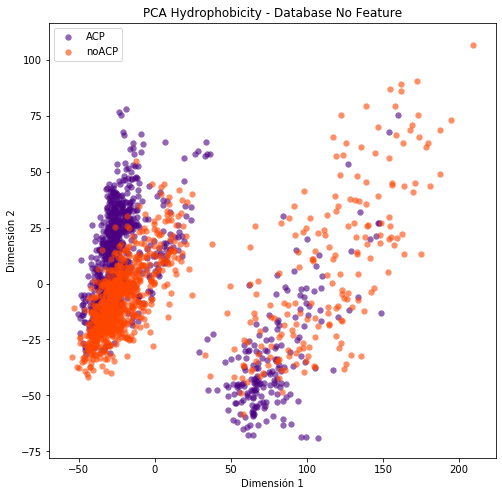

In [21]:
hydro()

Variance explained per principal component: [0.23232647 0.06723438 0.05775161 0.05405111]
Variance explained per principal component: [0.39452981 0.09190805 0.06050008 0.05384258]


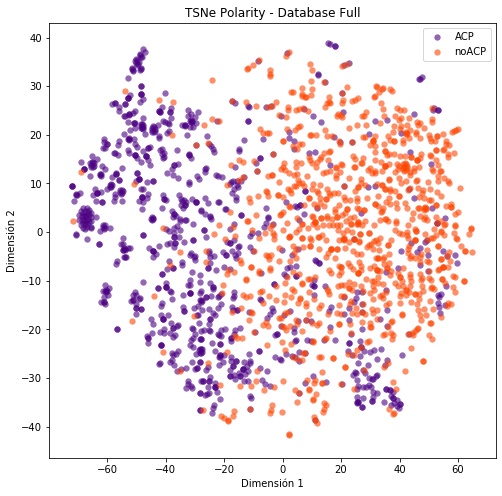

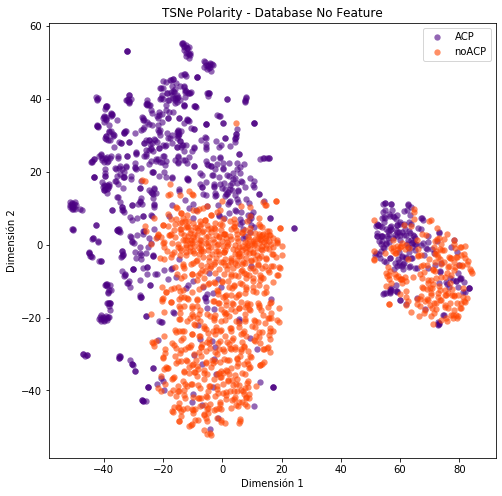

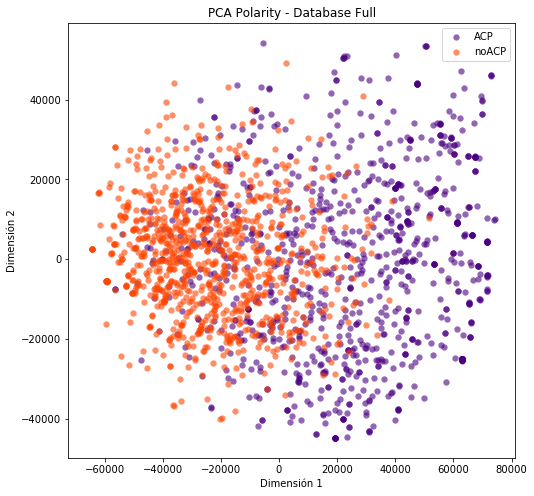

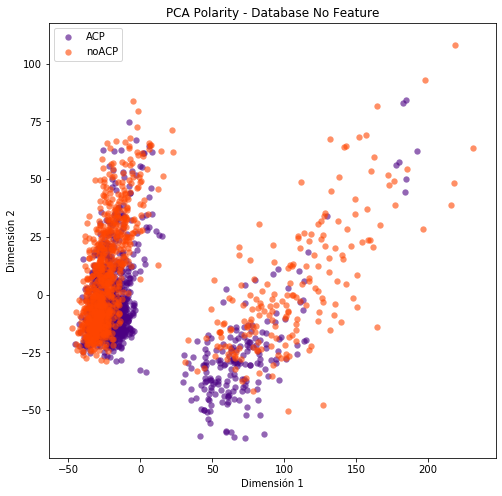

In [22]:
polarity()

Variance explained per principal component: [0.23232648 0.0672343  0.05775567 0.05405932]
Variance explained per principal component: [0.31982811 0.13705742 0.08564064 0.06253417]


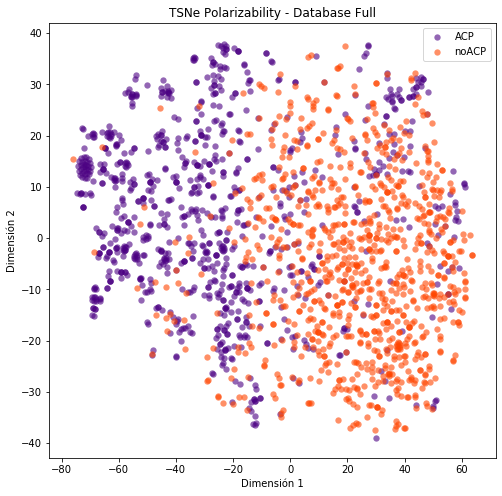

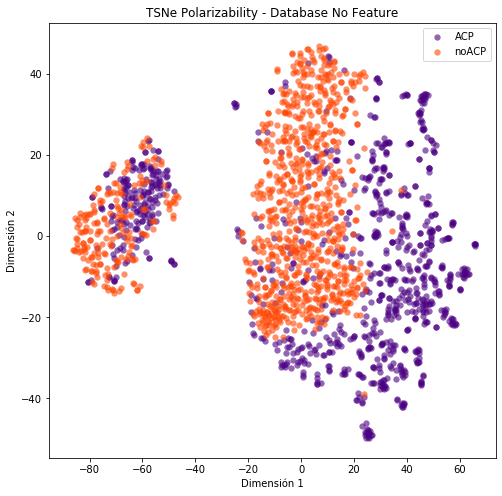

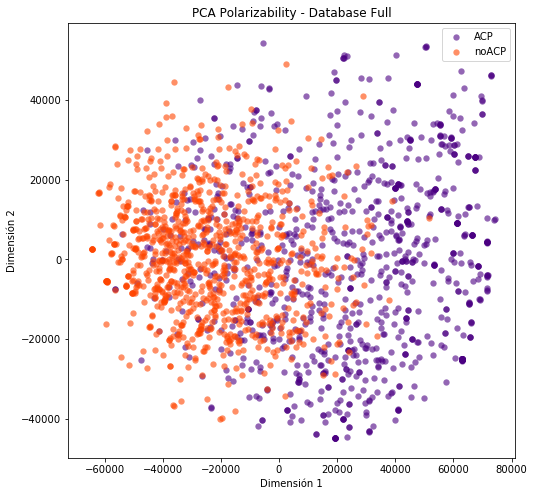

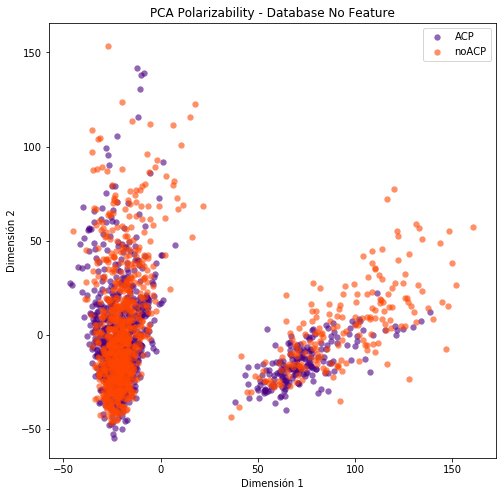

In [23]:
polarizability()

Variance explained per principal component: [0.23232647 0.06723353 0.05775412 0.05405863]
Variance explained per principal component: [0.37947611 0.1091343  0.08180548 0.05522991]


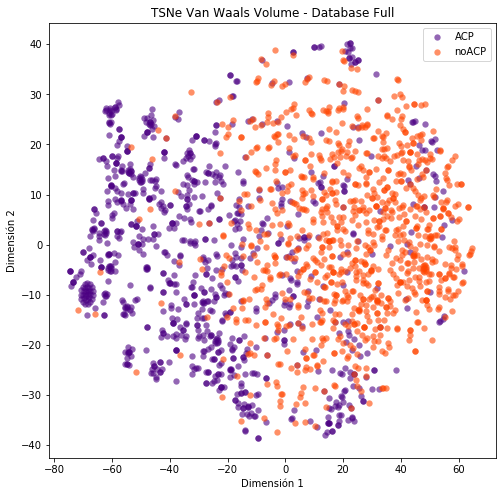

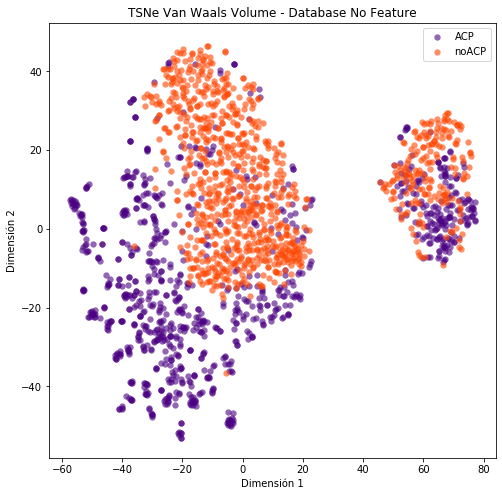

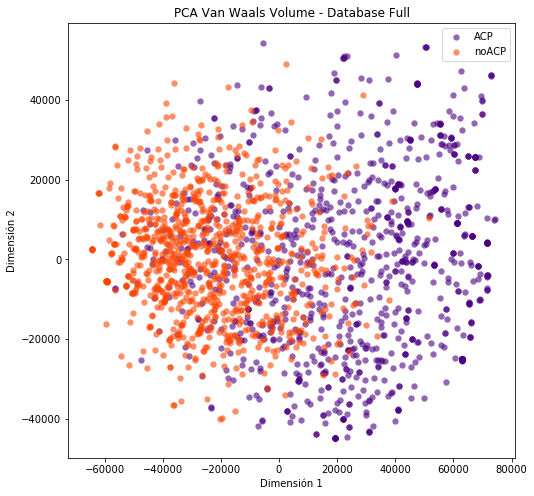

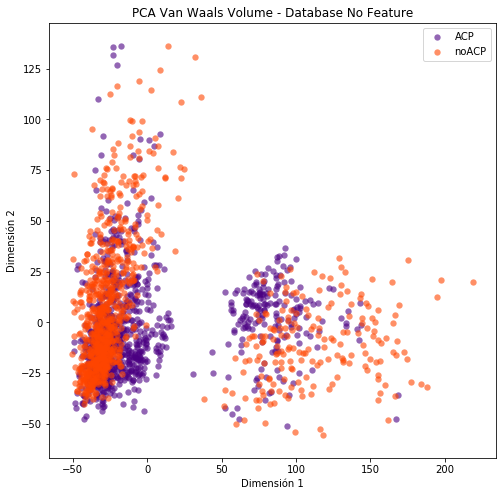

In [24]:
vanWaals()